[![Jupyter Notebook](https://img.shields.io/badge/Jupyter%20Notebook-orange)](https://github.com/laminlabs/redun-lamin-fasta/blob/main/docs/redun.ipynb)

# Redun

Here, we'll see how to track redun workflow runs with LaminDB.

```{note}

This use case is based on [github.com/ricomnl/bioinformatics-pipeline-tutorial](https://github.com/ricomnl/bioinformatics-pipeline-tutorial/tree/redun).

```

## Setup

In [ ]:
!lamin init --storage .  --name redun-lamin-fasta

## Register the workflow

In [1]:
import lamindb as ln
import json

💡 connected lamindb: laminlabs/lamindata


How to amend a redun workflow.py to register input & output files in LaminDB?

- To register the workflow in the `Transform` registry, we added [the following lines](https://github.com/laminlabs/redun-lamin-fasta/blob/main/docs/workflow.py#L43-L49):

    ```python
    # register the workflow in the `Transform` registry
    transform = ln.Transform(
        name=redun_lamin_fasta.__name__,
        version=redun_lamin_fasta.__version__,
        type="pipeline",
        reference="https://github.com/laminlabs/redun-lamin-fasta",
    ).save()
    ```

- To query input files via LaminDB, we added [the following lines](https://github.com/laminlabs/redun-lamin-fasta/blob/main/docs/workflow.py#L50-L57):

    ```python
    # query & track this pipeline
    ln.track(transform=transform, params=params)
    # register input files in lamindb
    ln.save(ln.Artifact.from_dir(input_dir, run=False))
    # query input files from lamindb
    input_filepaths = [
        artifact.cache() for artifact in ln.Artifact.filter(key__startswith="fasta/")
    ]
    ```

- To register the output file via LaminDB, we added [the following line](https://github.com/laminlabs/redun-lamin-fasta/blob/main/redun_lamin_fasta/lib.py#L315):

    ```python
    ln.Artifact(output_path, description="results").save()
    ```

## Run redun

Let's see what the input files are:

In [ ]:
!ls ./fasta

And call the workflow:

In [ ]:
!redun run workflow.py main --input-dir ./fasta --tag run=test-run  1> redun_stdout.txt 2>redun_stderr.txt

Inspect the output:

In [ ]:
!cat redun_stdout.txt

And the error log:

In [ ]:
!tail -1 redun_stderr.txt

View data lineage:

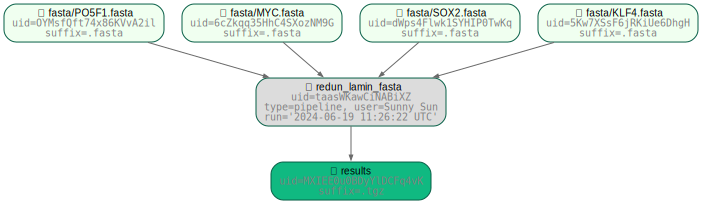

In [5]:
artifact = ln.Artifact.filter(description="results").one()  # query by description
artifact.view_lineage()

## Register the redun execution id

If we want to be able to query LaminDB for redun execution ID, this here is a way to get it:

In [6]:
# export the run information from redun
!redun log --exec --exec-tag run=test-run --format json --no-pager > redun_exec.json
# load the redun execution id from the JSON and store it in the LaminDB run record
with open('redun_exec.json', 'r') as file:
    redun_exec = json.loads(file.readline())
artifact.run.reference = redun_exec["id"]
artifact.run.reference_type = "redun_id"
artifact.run.save()

Run(uid='pyoxHFEYyIyKlX2UFxO3', started_at='2024-06-19 11:26:22 UTC', reference='fb33bb29-9af7-43d0-904a-a649132b862b', reference_type='redun_id', transform_id=114, created_by_id=2)

## Run report

Attach a run report:

In [7]:
report = ln.Artifact("redun_stderr.txt", description=f"Redun run report of {redun_exec['id']}", run=False, visibility=0).save()
artifact.run.report = report
artifact.run.save()
artifact.transform.latest_report
artifact.transform.save()

... uploading redun_stderr.txt: 100.0%


Run(uid='pyoxHFEYyIyKlX2UFxO3', started_at='2024-06-19 11:26:22 UTC', reference='fb33bb29-9af7-43d0-904a-a649132b862b', reference_type='redun_id', transform_id=114, created_by_id=2, report_id=818)

## View transforms and runs in LaminHub

https://lamin.ai/laminlabs/lamindata/transform/taasWKawCiNABiXZ

## View the database content

In [19]:
ln.view()

Artifact


,uid,version,description,key,suffix,accessor,size,hash,hash_type,n_objects,n_observations,visibility,key_is_virtual,storage_id,transform_id,run_id,created_by_id,updated_at
id,,,,,,,,,,,,,,,,,,
6,gLB23COOSq3XnziyhkqL,None,Redun run report of 12d0b426-8280-4af2-b22a-84...,redun_stderr.txt,.txt,None,12801,tKAmSqRl9DSlPGTWvKdoMw,md5,None,None,1,False,1,NaN,NaN,1,2024-06-19 10:31:30.284885+00:00
5,I1cAFLxY5glp6da2V7Rw,None,None,data/results.tgz,.tgz,None,88312,3RN44dGVgGiF2kLETmLiSg,md5,None,None,1,False,1,1.0,2.0,1,2024-06-19 09:33:37.579706+00:00
4,GpE5HS6kXatfggZJ8LPo,None,None,fasta/MYC.fasta,.fasta,None,536,WGbEtzPw-3bQEGcngO_pHQ,md5,None,None,1,False,1,NaN,NaN,1,2024-06-19 09:33:11.023890+00:00
3,LQd8HPHpYn2idfUP8RB8,None,None,fasta/PO5F1.fasta,.fasta,None,477,-7iJgveFO9ia0wE1bqVu6g,md5,None,None,1,False,1,NaN,NaN,1,2024-06-19 09:33:11.023402+00:00
2,a6RASDKCfNS8ppwh3o96,None,None,fasta/KLF4.fasta,.fasta,None,609,LyuoYkWs4SgYcH7P7JLJtA,md5,None,None,1,False,1,NaN,NaN,1,2024-06-19 09:33:11.022391+00:00
1,M5h7A5nDUvr6lgfBwrpP,None,None,fasta/SOX2.fasta,.fasta,None,414,C5q_yaFXGk4SAEpfdqBwnQ,md5,None,None,1,False,1,NaN,NaN,1,2024-06-19 09:33:11.021358+00:00


Run


,uid,started_at,finished_at,is_consecutive,reference,reference_type,transform_id,report_id,environment_id,created_by_id
id,,,,,,,,,,
1,jJTIWGgDw2XQUcTrp533,2024-06-19 09:31:05.117170+00:00,None,None,None,None,1,NaN,None,1
2,vkM6qfE6fffWRtBZjDyB,2024-06-19 09:33:11.028276+00:00,None,None,12d0b426-8280-4af2-b22a-8488c43702a5,redun_id,1,6.0,None,1


Storage


,uid,root,description,type,region,instance_uid,run_id,created_by_id,updated_at
id,,,,,,,,,
1,rO4DUPbdkjoO,/Users/sunnysun/Documents/repos.nosync/redun-l...,None,local,None,7fBxMkF4H7UY,None,1,2024-06-19 09:00:40.258330+00:00


Transform


,uid,version,name,key,description,type,reference,reference_type,latest_report_id,source_code_id,created_by_id,updated_at
id,,,,,,,,,,,,
1,OqBpxUPk1iAqmd4P,0.1.0,redun_lamin_fasta,None,None,pipeline,https://github.com/laminlabs/redun-lamin-fasta,None,None,None,1,2024-06-19 09:19:35.585525+00:00


User


,uid,handle,name,updated_at
id,,,,
1,kmvZDIX9,sunnyosun,Sunny Sun,2024-06-19 09:00:40.253878+00:00


Delete the test instance:

In [ ]:
!lamin delete --force redun-lamin-fasta